In [0]:
import pandas as pd

df = pd.read_csv('power_new.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'],index_col='dt')
print(df)

                     Global_active_power  ...  Sub_metering_3
dt                                        ...                
2006-12-16 17:24:00                4.216  ...            17.0
2006-12-16 17:25:00                5.360  ...            16.0
2006-12-16 17:26:00                5.374  ...            17.0
2006-12-16 17:27:00                5.388  ...            17.0
2006-12-16 17:28:00                3.666  ...            17.0
2006-12-16 17:29:00                3.520  ...            17.0
2006-12-16 17:30:00                3.702  ...            17.0
2006-12-16 17:31:00                3.700  ...            17.0
2006-12-16 17:32:00                3.668  ...            17.0
2006-12-16 17:33:00                3.662  ...            16.0
2006-12-16 17:34:00                4.448  ...            17.0
2006-12-16 17:35:00                5.412  ...            17.0
2006-12-16 17:36:00                5.224  ...            16.0
2006-12-16 17:37:00                5.268  ...            17.0
2006-12-

In [0]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score


import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
#fill the missing values with mean
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
df.shape


(2075259, 7)

In [0]:
df['Year'] =df.index.year
df['Month'] = df.index.month
df['day']=df.index.day
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,day
dt,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006,12,16
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006,12,16
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2006,12,16


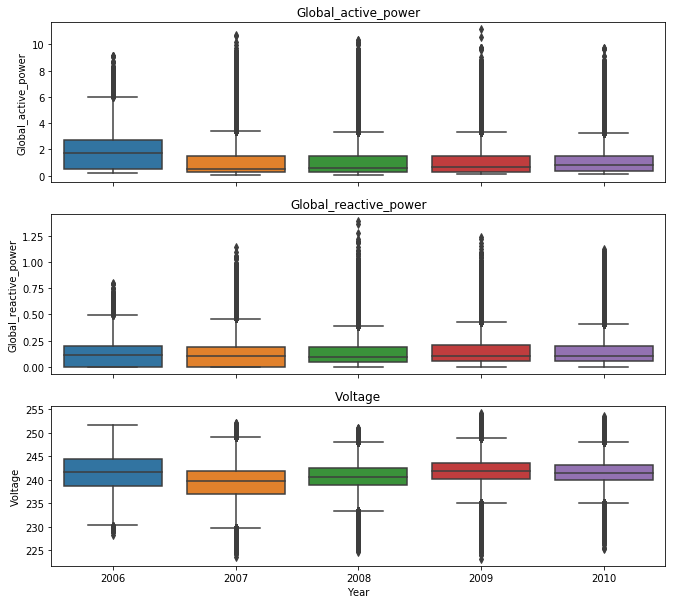

In [0]:
#boxplot(outliers)
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3'], axes):
  sns.boxplot(data=df, x='Year', y=name, ax=ax)
  ax.set_title(name)

  if ax != axes[-1]:
    ax.set_xlabel('')

In [0]:
df.drop(["Year", "Month","day"], axis = 1, inplace = True) 
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


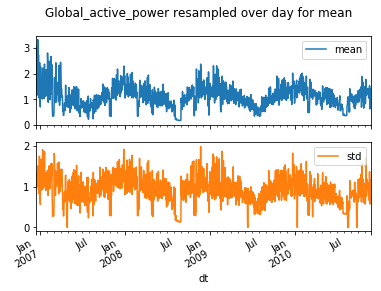

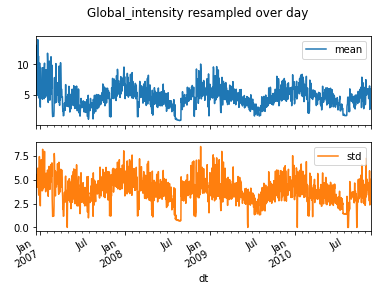

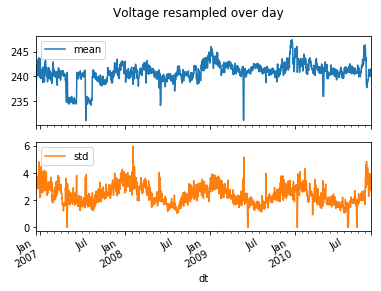

In [0]:
#from matplotlib import pyplot
#df.plot()
#pyplot.show()
##to show data is not stationary
s=df.Global_active_power.resample('D').agg(['mean', 'std'])
s.plot(subplots = True,title='Gacpower resampled over day ') 

plt.show()

r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Gintensity resampled over day')
plt.show()


r = df.Voltage.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Volt resampled over day')
plt.show()


In [0]:
#histogram
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

In [0]:
def toSupervised(dt, n_in=1, n_out=1, dropnan=True):
	varss = 1 if type(dt) is list else dt.shape[1]
	dfff = pd.DataFrame(dt)
	col, name = list(), list()
	#input the sequence (t-n, till t-1)
	for i in range(n_in, 0, -1):
		col.append(dfff.shift(i))
		name += [('var%d(t-%d)' % (j+1, i)) for j in range(varss)]
    
	#forecast the sequence (t, t+1, till t+n)
	for i in range(0, Out):
		col.append(dfff.shift(-i))
		if i == 0:
			name += [('var%d(t)' % (j+1)) for j in range(varss)]
		else:
			name += [('var%d(t+%d)' % (j+1, i)) for j in range(varss)]
  
  
	
	agg = pd.concat(col, axis=1)
	agg.columns = name
	#drop the rows with null values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
## resampling of data over hour
df_r = df.resample('h').mean() 
df_r.shape

(34589, 7)

In [0]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

val = df_r.values 



s = MinMaxScaler(feature_range=(0, 1))
scaled = s.fit_transform(val)

reFramedd = toSupervised(scaled, 1, 1)

reFramedd.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reFramedd.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var6(t-1)  var7(t-1)   var1(t)
1   0.636816   0.295738   0.337945  ...   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.335501  ...   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.283802  ...   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.315987  ...   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.434417  ...   0.008973   0.798917  0.322555

[5 rows x 8 columns]


In [0]:

values = reframed.values

n_train_time = 365*24 #in terms of hours
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
#3D input for LSTM [samples, timesteps, features].

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8760 samples, validate on 25828 samples
Epoch 1/20





 - 2s - loss: 0.0202 - val_loss: 0.0124
Epoch 2/20
 - 1s - loss: 0.0130 - val_loss: 0.0113
Epoch 3/20
 - 1s - loss: 0.0118 - val_loss: 0.0100
Epoch 4/20
 - 1s - loss: 0.0110 - val_loss: 0.0094
Epoch 5/20
 - 1s - loss: 0.0107 - val_loss: 0.0094
Epoch 6/20
 - 1s - loss: 0.0107 - val_loss: 0.0092
Epoch 7/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 8/20
 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 9/20
 - 1s - loss: 0.0106 - val_loss: 0.0091
Epoch 10/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 11/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 12/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 13/20
 - 1s - loss: 0.0105 - val_loss: 0.0091
Epoch 14/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 15/2

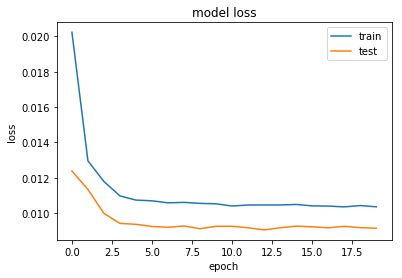

Test RMSE: 0.616


In [0]:

Model = Sequential()
Model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
Model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



#Fitting the network
h = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
plt.plot(h.h['loss'])
plt.plot(h.h['val_loss'])
plt.title('model loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#prediction 
yh = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
i_y = np.concatenate((yh, test_X[:, -6:]), axis=1)
i_y = scaler.inverse_transform(i_y)
i_y = i_y[:,0]
test_y = test_y.reshape((len(test_y), 1))
i_yy = np.concatenate((test_y, test_X[:, -6:]), axis=1)
i_yy = scaler.inverse_transform(i_yy)
i_yy = i_yy[:,0]
#calculating the RMSE value
RMSE = np.sqrt(mean_squared_error(i_yy, i_yy))
print('Test RMSE: %.3f' % RMSE)

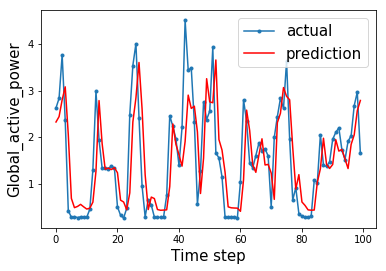

In [0]:
## every timestep is one hour
aa=[x for x in range(100)]
plt.plot(aa, inv_y[:100], marker='.', label="actual")
plt.plot(aa, inv_yhat[:100], 'r', label="prediction")
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()